In [1]:
import nest_asyncio
from dotenv import load_dotenv

from langchain_openai import ChatOpenAI

from src.database import VectorDB
from src.model import *
from src.model_grader import *
from src.utils import check_required_env_vars

nest_asyncio.apply()
load_dotenv()

True

In [2]:
check_required_env_vars()

{}

In [3]:
db = VectorDB()
db.enable_hnsw_indexing()

HNSW extension and index created successfully.


In [4]:
query = """Tell me about the Liberty of the person under the constitution of Singapore:
(5)  Clauses (3) and (4) shall not apply to an enemy alien or to any person arrested for 
contempt of Parliament pursuant to a warrant issued under the hand of the Speaker."""
# query = "Can I count to the number 30 with someone else's hands?"
# query = "Is it legal to call someone a 'dumb dumb bubblegum'?"
# query = "人を殺すってだめですか？"
# query = "Would it be illegal if I went 'bippity boppity, I'mma steal your intellectual property' in Singapore?"
# query = "Is it illegal to be stupid in Singapore?"
# query = "I want to play Monster Hunter Wilds, but it's $100. :("

vectorstore_summary = "It includes the reliable information of the constitution of the republic of Singapore."

model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

inputs = {
    "query": query,
    "db": db,
    "model": model,
    "vectorstore_summary": vectorstore_summary,
    "retrieved_docs":[""],
    "depth": 0,
    "excluded_file_ids": set(),
    "hallucination": False,
    "hallucination_reason": "",
    "quality": True,
    "quality_reason": "",
    "compliance": True,
    "compliance_reason": ""
}

response = build_graph()
app = response.compile()

output = app.invoke(inputs)

In [5]:
from pprint import pprint

pprint(output)

{'complexity': 'medium',
 'compliance': True,
 'compliance_reason': 'The response accurately reflects the provisions of '
                      'Article 9 of the Singapore Constitution regarding '
                      'personal liberty and aligns with Singaporean law.',
 'db': <src.database.VectorDB object at 0x11cd5de80>,
 'depth': 1,
 'excluded_file_ids': {'4eee2687-f1ff-46c0-8481-0b42c01834ac',
                       'da9024e6-e446-4bf7-828f-bac31db60040',
                       'f7557772-dcfa-4bca-81c8-20c75814c10f'},
 'hallucination': False,
 'hallucination_reason': 'The statements accurately reflect the provisions of '
                         'Article 9 of the Constitution of Singapore regarding '
                         'personal liberty and lawful detention.',
 'model': ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x11bb174d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x11bb167b0>, root_client=<openai.OpenAI obj

In [6]:
print(output["response"].content)

### **Liberty of the Person under the Constitution of Singapore**

- **Legal Basis**: The liberty of the person is primarily governed by Article 9 of the Constitution of the Republic of Singapore. This article states:
  - **Article 9(1)**: "No person shall be deprived of his life or personal liberty save in accordance with law."
  - **Article 9(2)**: "Where a complaint is made to the General Division of the High Court or any Judge sitting in the General Division of the High Court that a person is being unlawfully detained, the General Division of the High Court shall inquire into the complaint and, unless satisfied that the detention is lawful, shall order him to be produced before the General Division of the High Court and release him."

- **Explanation**: Article 9(1) establishes a fundamental right to personal liberty, ensuring that no individual can be deprived of their liberty without due process of law. This means that any detention must be lawful and must follow the procedures e

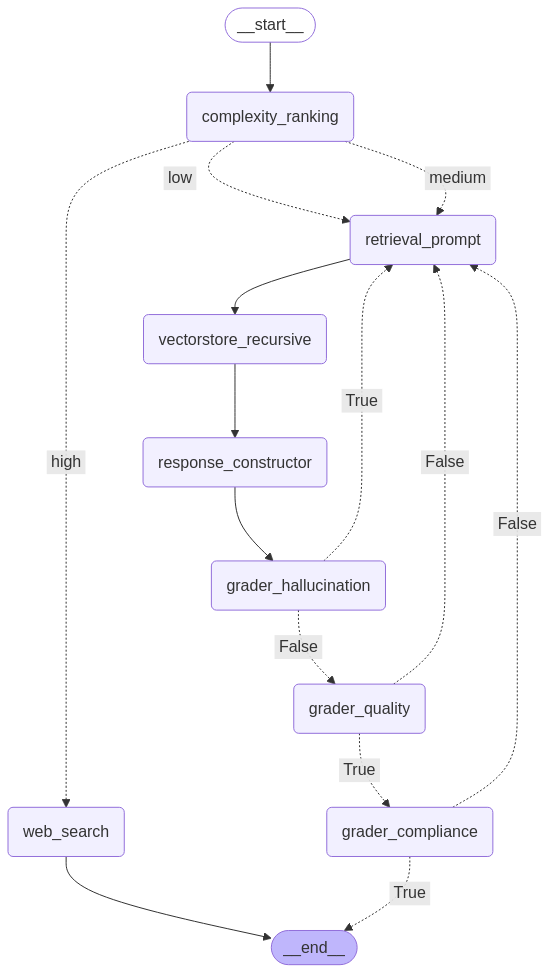

In [7]:
app